Exercise 1




**(a)** To determine the posterior distribution $P(\mu|\{x_j\}M)$ for $\mu$ we can use Bayes theorem

$$
P(\mu|\{x_j\}M) \propto f(\{x_j\}|\mu M) \times g(\mu | M)
$$

where $f(\{x_j\}|\mu M)$ is the Likelihood, which for multiple independent measurments of a Poisson process (such as the decay of a radiocative source) 
and $g(\mu | M)$ is the Prior distribution, we are assuming to be uniform  


This is equivalent to a Gamma distribution function

$$
\operatorname{Gamma}(x | \alpha, \lambda)=k x^{\alpha-1} \mathrm{e}^{-\lambda x}
\qquad \text{with} \qquad k= \frac{\lambda^{\alpha}}{\Gamma(\alpha)}
$$

where $\alpha = \sum x_j + 1 = 13$ and $\lambda = n = 5$

The posterior is:
$$
\begin{aligned}
P(\mu| \{x_j\} M) & \propto f(\{x_j\}|\mu M) \times g(\mu | M) \\
& \propto \mu^{\sum x_{j}} \times \mathrm{e}^{-(n \mu)} \\
& \propto \operatorname{Gamma}(x | \alpha, \lambda) 
\end{aligned}.
$$

To compute the mean and variance we can use the analytical expressions for a Gamma distribution:
$$
E[\mu]=\frac{\alpha}{\lambda} \qquad \text{Var}[\mu]=\frac{\alpha}{\lambda^2}
$$

We can also compute them numerically as 

$$
E[\mu] = \int_{0}^{+\infty} x f(\mu) d\mu   \qquad \text{Var}[\mu] = E[\mu^2] - E[\mu]^2
$$

The median can be computed using the quantile function with $50 \%$ of the total area.

[1] "Numerical mean: 2.59999999867881 2.60000000000019 and variance: 0.519999993308408"
[1] "Theoretical mean: 2.6 and variance: 0.52"
[1] "Numerical median: 2.4001"
[1] "Theoretical median: 2.53364581174773"


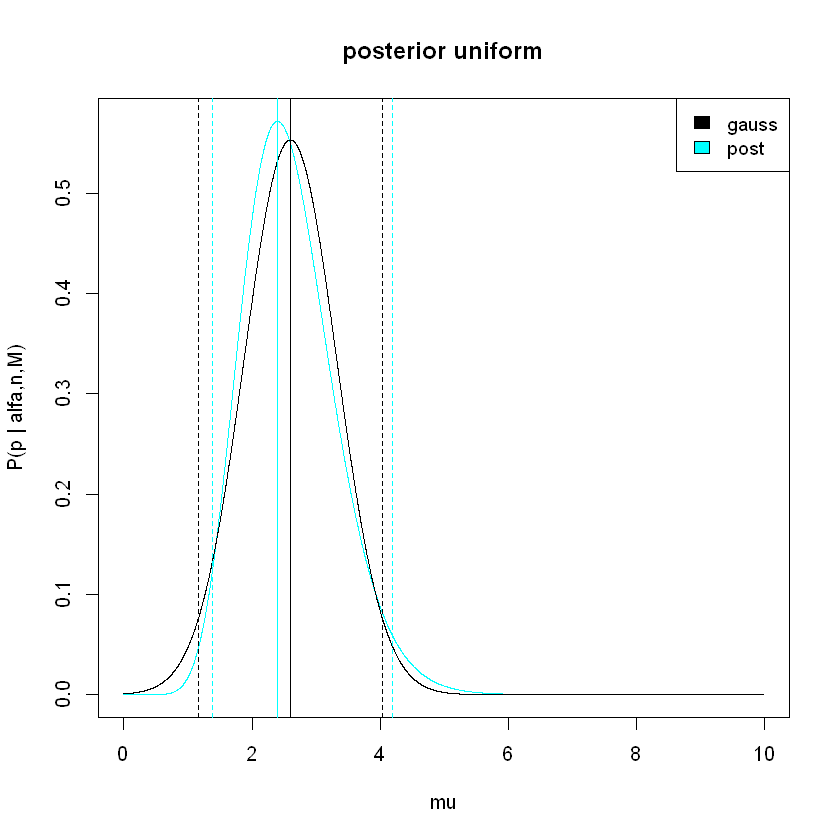

In [19]:
alfa_unif <- 13
lambda_n <- 5
n_sample <- 5000
delta_mu <- 10/n_sample
mu <- seq(from=1/(2*n_sample), by=delta_mu , length.out=n_sample)

#uniform
prior_unif <- dunif(mu)
prior_unif <- 0*mu+1

#post
post_unif <- dgamma(mu, alfa_unif, lambda_n)
plot(mu, post_unif, type="l", lwd=1.5, col='cyan',  ylab="P(p | alfa,n,M)", main='posterior uniform')

#mean
E_unif <- delta_mu*sum(mu*post_unif)
E_unif_alternative <- integrate(function(x) {x*dgamma(x, alfa_unif, lambda_n)}, 0, Inf)
e_unif <- alfa_unif/lambda_n

#median
median_unif <- mu[which.max(post_unif)]
m_unif <- qgamma(0.5, alfa_unif, lambda_n)

#var
E2_unif <- delta_mu*sum(mu^2*post_unif)
V_unif <- E2_unif - E_unif^2
v_unif <- alfa_unif/(lambda_n*lambda_n)

#sigma
S_unif <- sqrt(V_unif)
s_unif <- sqrt(v_unif)

#95%
x0_unif <- qgamma(0.025, alfa_unif, lambda_n)
x1_unif <- qgamma(0.975, alfa_unif, lambda_n)

#gauss approx
lines(mu, dnorm(mu, E_unif, S_unif), lwd=1.5)
abline(v=median_unif, lty=1, col='cyan')
abline(v=E_unif)
abline(v=x0_unif, lty=2, col='cyan')
abline(v=x1_unif, lty=2, col='cyan')
abline(v=E_unif+2*S_unif, lty=2)
abline(v=E_unif-2*S_unif, lty=2)
legend("topright", c("gauss","post"), fill = c("black", "cyan"), cex=0.95)

print(paste("Numerical mean:", E_unif ,E_unif_alternative$value, "and variance:", V_unif))
print(paste("Theoretical mean:", e_unif, "and variance:", v_unif))
print(paste("Numerical median:", median_unif))
print(paste("Theoretical median:", m_unif))


**(b)** If we instead choose as $g(\mu | M)$ Jeffrey's Prior   

$$
g(\mu | M) \propto \frac{1}{\sqrt{\mu}} \qquad \forall \mu>0
$$

combining it with the Likelihood the Posterior is:

$$
\begin{aligned}
P(\mu|\{x_j\}M) & \propto f(\{x_j\}|\mu M) \times g(\mu | M) \\
& \propto \mu^{\sum x_{j}} \times \mathrm{e}^{-(n \mu)} \times \frac{1}{\sqrt{\mu}}\\
& \propto \mu^{\sum x_{j} - \frac{1}{2}} \times \mathrm{e}^{-(n \mu)}\\
& \propto \operatorname{Gamma}(x | \alpha', \lambda)
\end{aligned}
$$

where $\alpha' = \sum x_j + 1\frac{1}{2} = 12.5$ and $\lambda = n = 5$

[1] "Numerical mean: 2.49999999935431 2.50000000000012 and variance: 0.499999996602687"
[1] "Theoretical mean: 2.5 and variance: 0.5"
[1] "Numerical median: 2.3001"
[1] "Theoretical median: 2.43365866978843"


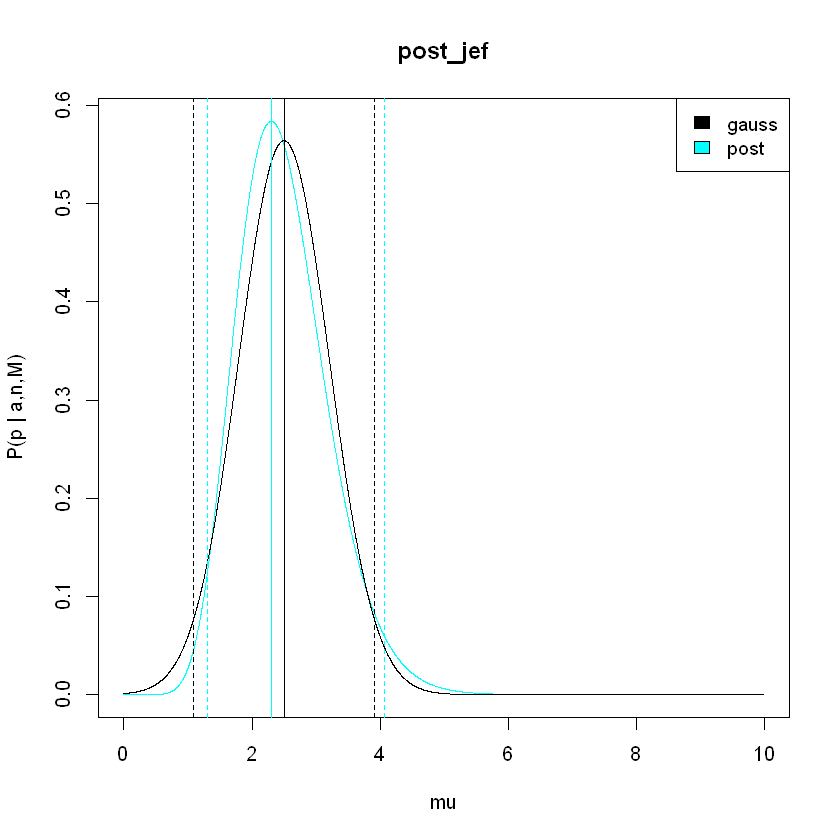

In [24]:
#Jeffrey
prior_jef <- mu^(-1/2)
alfa_jef <- 25/2
post_jef <- dgamma(mu, alfa_jef, lambda_n)
plot(mu, post_jef, type="l", lwd=1.5, col='cyan',  ylab="P(p | a,n,M)", main='post_jef')

E_jef <- delta_mu*sum(mu*post_jef)
E_jef_alternative <- integrate(function(x) {x*dgamma(x, alfa_jef, lambda_n)}, 0, Inf)
e_jef <- alfa_jef/lambda_n

median_jef <- mu[which.max(post_jef)]
m_jef <- qgamma(1/2, alfa_jef, lambda_n)

E2_jef <- delta_mu*sum(mu^2*post_jef)

V_jef <- E2_jef - E_jef^2
v_jef <- alfa_jef/lambda_n^2

S_jef <- sqrt(V_jef)
s_jef <- sqrt(v_jef)

#95%
x0_jef <- qgamma(0.025, alfa_jef, lambda_n)
x1_jef <- qgamma(0.975, alfa_jef, lambda_n)

lines(mu, dnorm(mu, E_jef, S_jef), lwd=1.5)
abline(v=median_jef, lty=1, col='cyan')
abline(v=E_jef)
abline(v=x0_jef, lty=2, col='cyan')
abline(v=x1_jef, lty=2, col='cyan')
abline(v=E_jef+2*S_jef, lty=2)
abline(v=E_jef-2*S_jef, lty=2)
legend("topright", c("gauss","post"), fill = c("black", "cyan"), cex=0.95)

print(paste("Numerical mean:", E_jef ,E_jef_alternative$value, "and variance:", V_jef))
print(paste("Theoretical mean:", e_jef, "and variance:", v_jef))
print(paste("Numerical median:", median_jef))
print(paste("Theoretical median:", m_jef))


**(c)** 

We computed the credibility interval using the quantile qgamma(0.025, alpha, n) to find the left extreme and qgamma(0.975, alpha, n) for the right one. 


Exercise 2

Given the problem of the lightouse discussed last week, 
study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

For the **Priors**, since the distribution of these two parameters are independent, we can consider the product of the Priors for the two coordinates: 
$$
P(\alpha, \beta) = P(\alpha)P(\beta)
$$
where $P(\alpha)$ is the Prior distribution of the position along the shore $\alpha$ and $P(\beta)$ the Prior of the distance out at sea $\beta$. Since we know nothing about the two parameters we can choose a uniform distribution for both variables:

$$
P(\alpha) = \frac{1}{\alpha_{\text{max}}-\alpha_{\text{min}}} \qquad \text{for } x \in [\alpha_{\text{min}}, \alpha_{\text{max}}]
\qquad \qquad 
P(\beta) = \frac{1}{\beta_{\text{max}}}\qquad\text{for } y \in [0 , \beta_{\text{max}}]
$$

For the **Likelihood** since the lighthouse emits at random angles we can assume a uniform Likelihood pdf on the azimuth angle $\theta_k$.

$$
P(\theta_k| \alpha,\beta) = \frac{1}{\pi} \qquad \text{for } \theta_k \in \left[-\frac{\pi}{2}, \frac{\pi}{2}\right] 
$$

The angle of emission $\theta_k$ is connected to $\alpha$ and $\beta$ by the relation
$$
x_k - \alpha = \beta \tan{\theta_k}
$$

we can thus perform a change of variable to obtain the pdf in terms of $x_k$ instead of $\theta_k$:

$$
\begin{aligned}
P(x_k | \alpha, \beta) & = P(\theta_k | \alpha, \beta) \left| \frac{d \theta_k}{d x_k} \right|\\
& = \frac{1}{\pi} \frac{\beta}{\beta^{2}+(x_k-\alpha)^{2}}
\end{aligned}
$$

This pdf is a Cauchy distribution symmetric about the maximum $\alpha$ and with FWHM $2 \beta$.

Since the recording of one signal does not influence what we can infer about the lighthouse's position in the following measures (i.e. the measures are independent) the Likelihood of the whole dataset $D$ is given by the product of the Likelihoods of each individual detection:

$$
P(D |\alpha, \beta) = \prod_k P(x_k | \alpha, \beta)
$$

To find the **Posterior** we can resort to Bayes'Theorem:

$$
P(\alpha, \beta|D) \propto P(D|\alpha, \beta) \times P(\alpha, \beta)
$$
could included $Z$ as a normalization factor for all terms not depending on $\alpha$ amd $\beta$.

Since all pdfs are uniform except for the Likelihood of $x_k$, the final Posterior will be a re-normalization of the Likelihood. To make the computation easier and eliminate the product we can take the natural logarithm:

$$
L = \ln P(\alpha, \beta | D) = \text{const} - \sum_k \ln[\beta^2 + (x_k - \alpha)^2]
$$

In fact, the best parameters $(\alpha_0, \beta_0)$ are given by the maximum of the Posterior and, since the logarithm is a monotone increasing function, we can simply compute the max of $L$:

$$
\frac{dL}{d \alpha} \bigg\rvert_{\alpha_0} = 2\sum_k \frac{x_k - \alpha_0}{\beta^2 + (x_k - \alpha_0)^2} = 0 \qquad
\frac{dL}{d \beta} \bigg\rvert_{\beta_0} = - 2\sum_k \frac{\beta_0}{\beta_0^2 + (x_k - \alpha)^2} = 0
$$

First of all, we have to generate a random dataset and the true values of $\alpha$ and $\beta$ to simulate the problem and the inference process.  


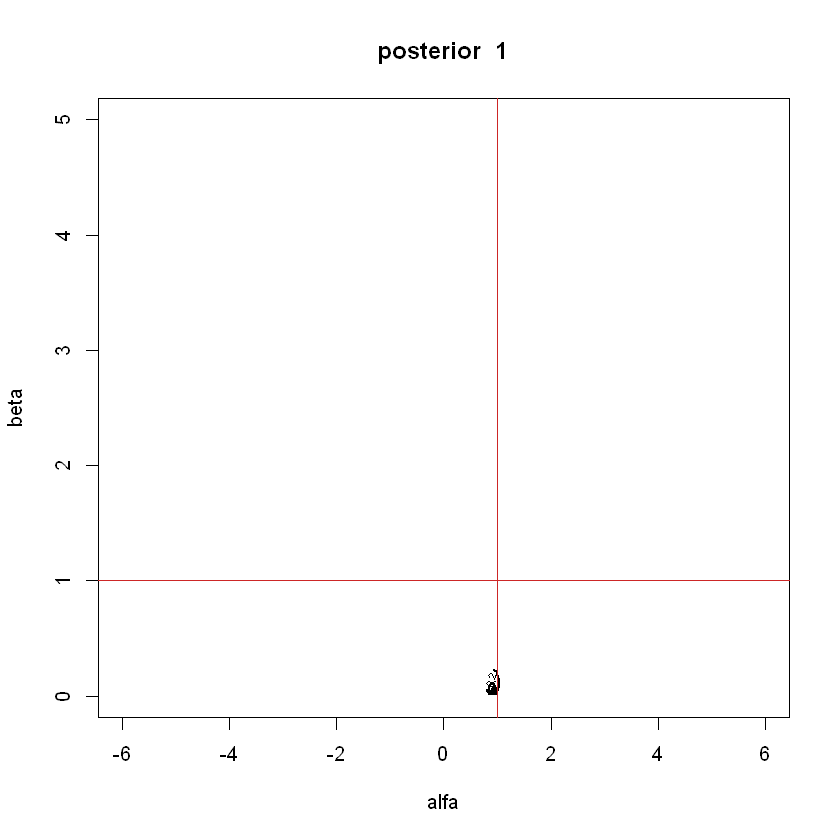

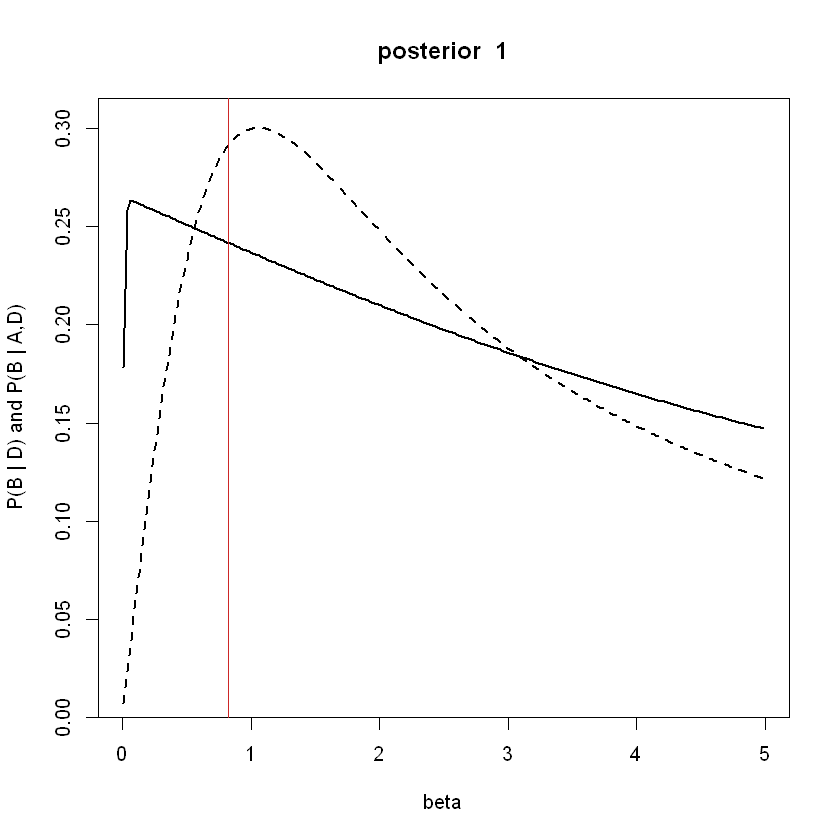

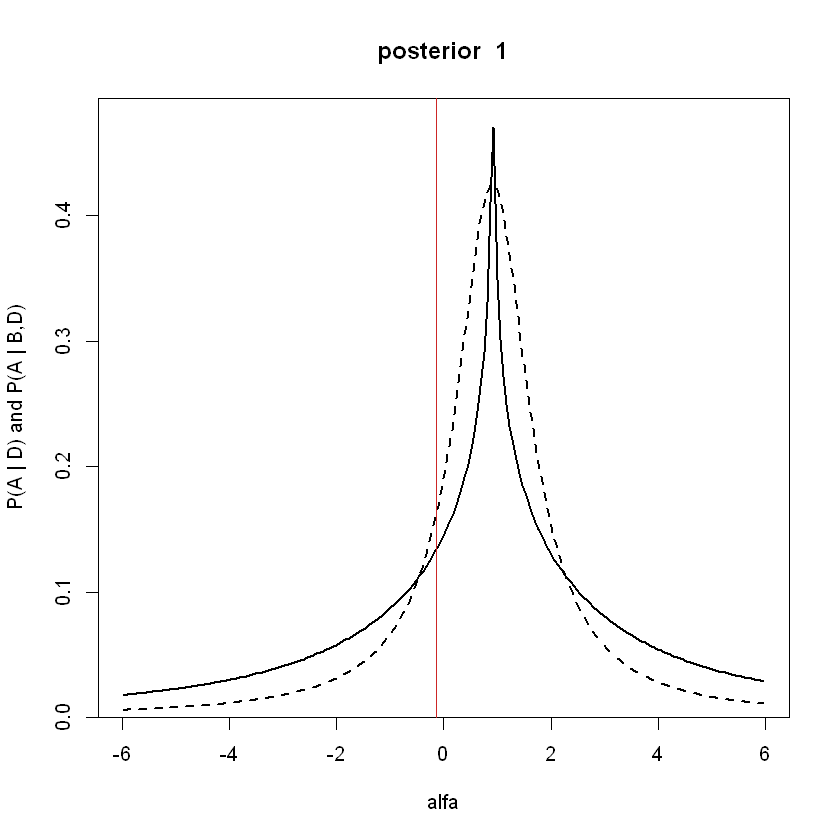

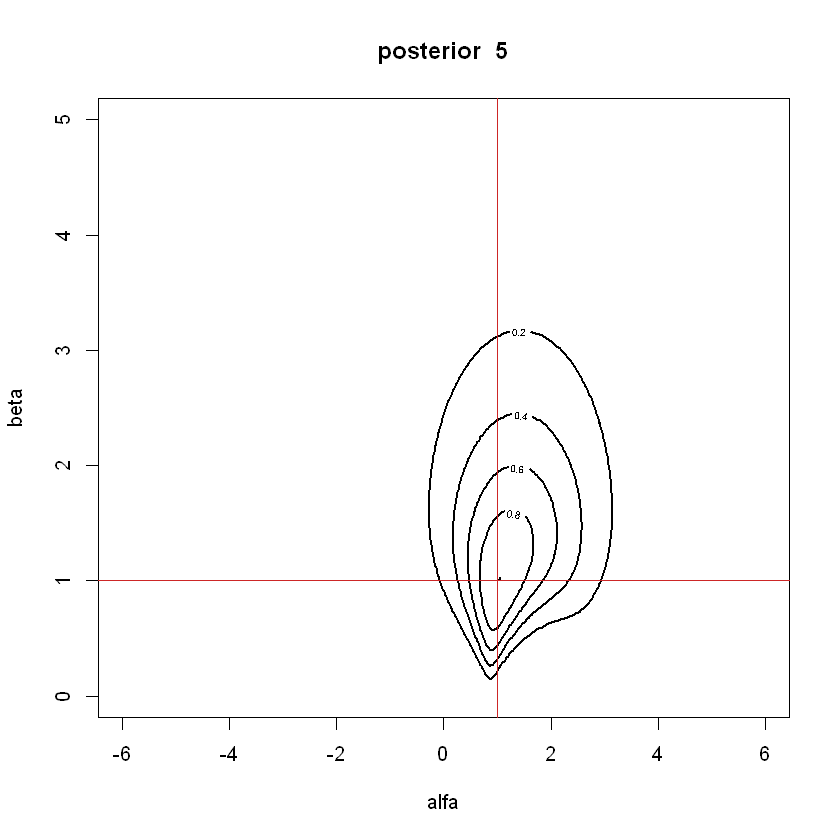

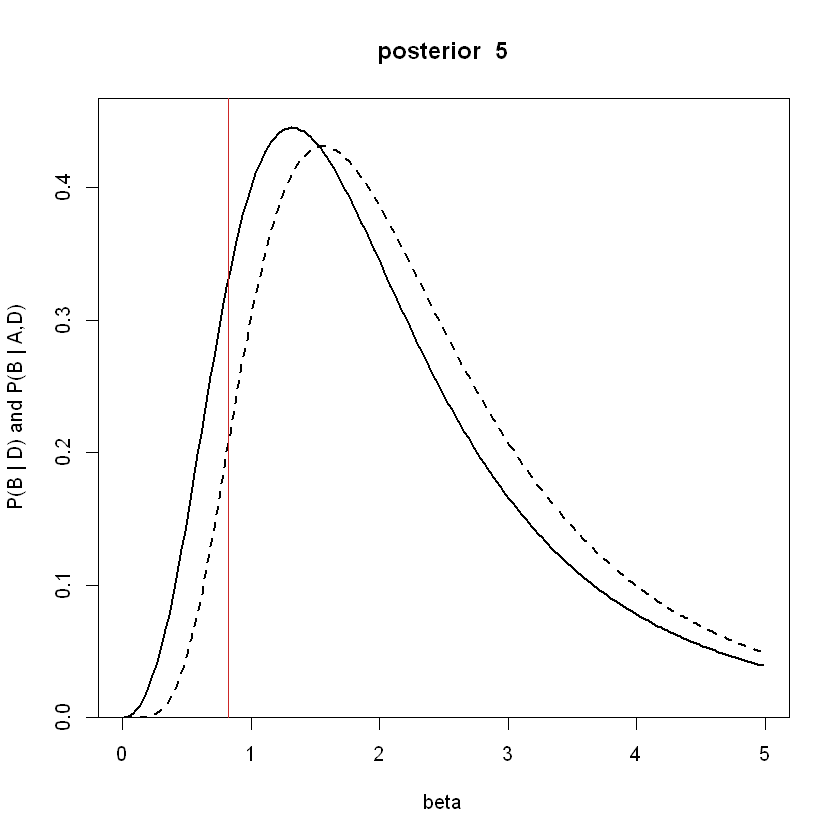

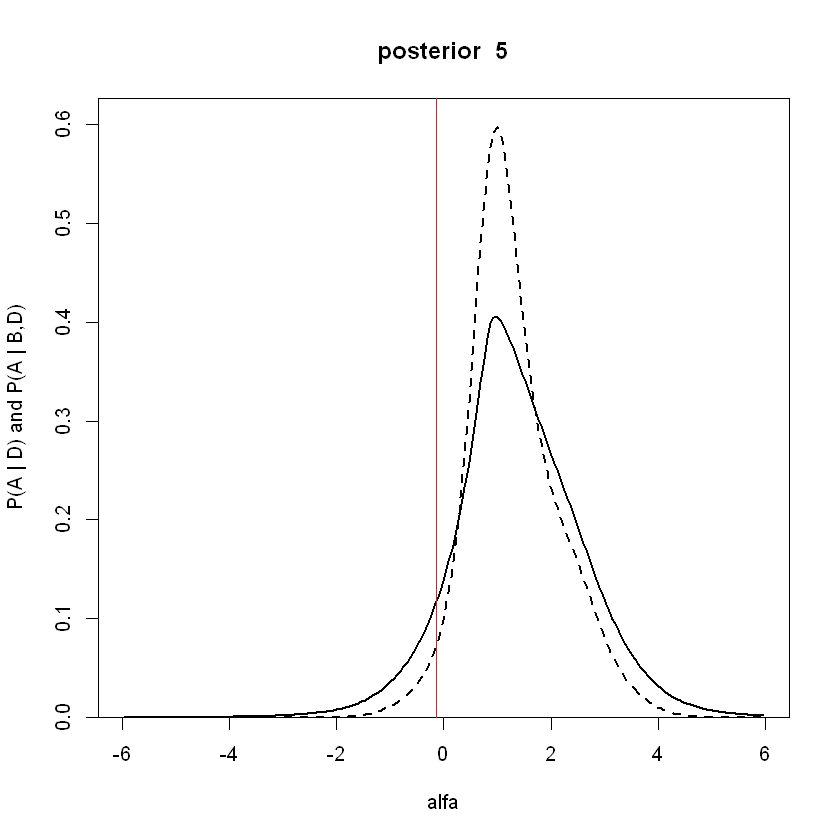

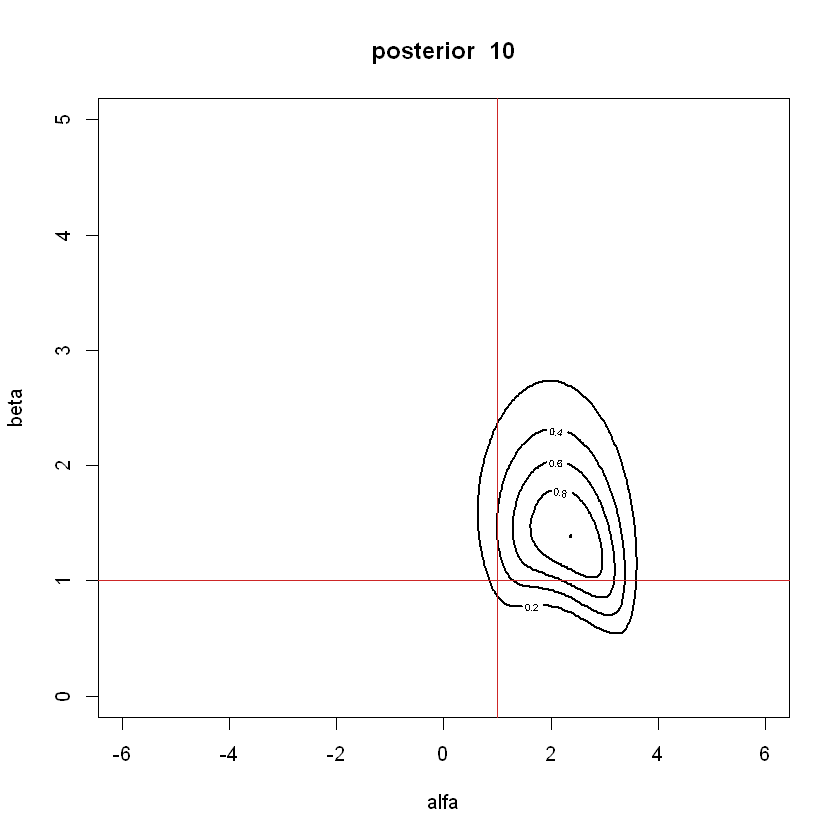

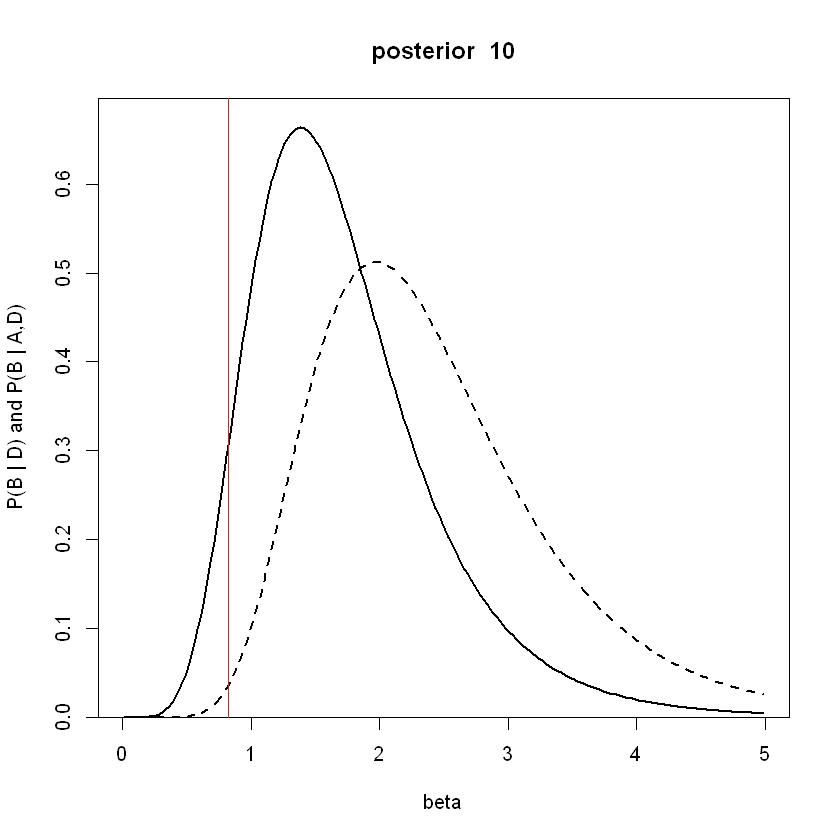

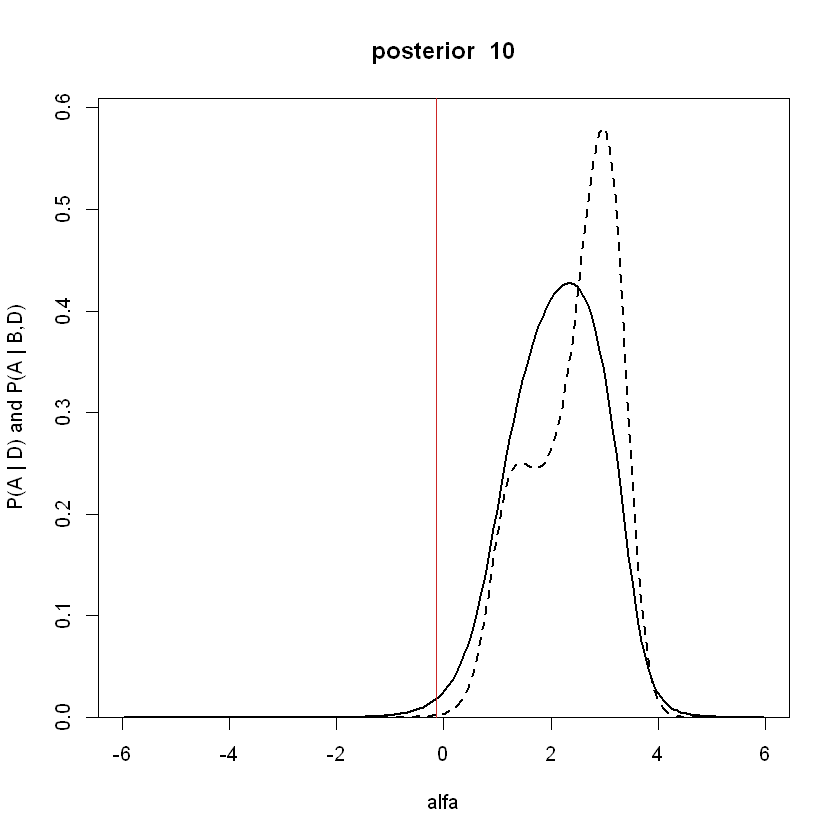

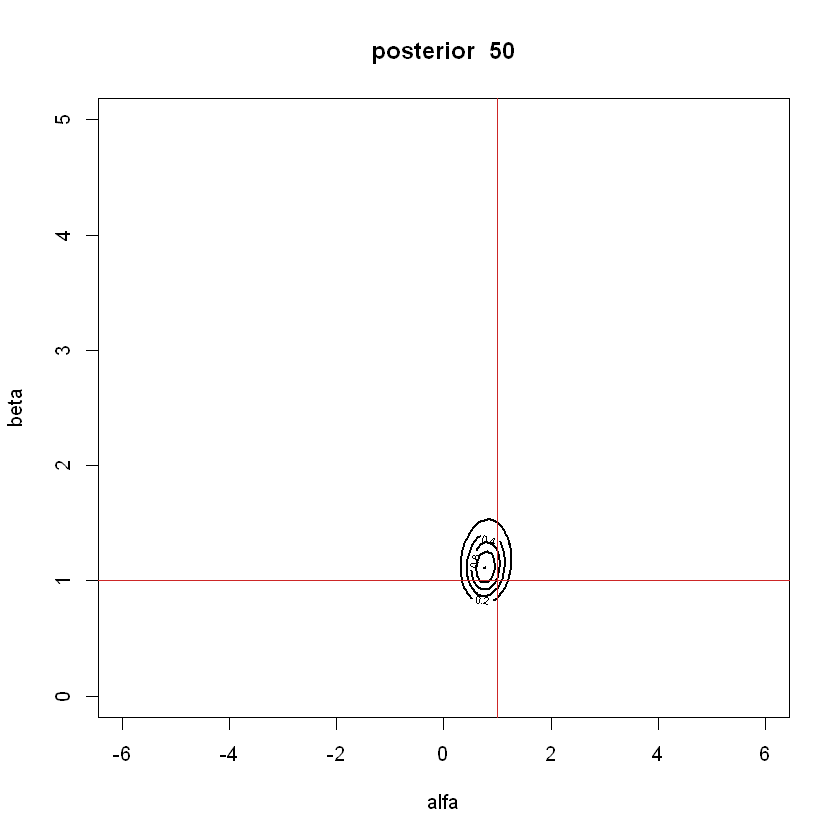

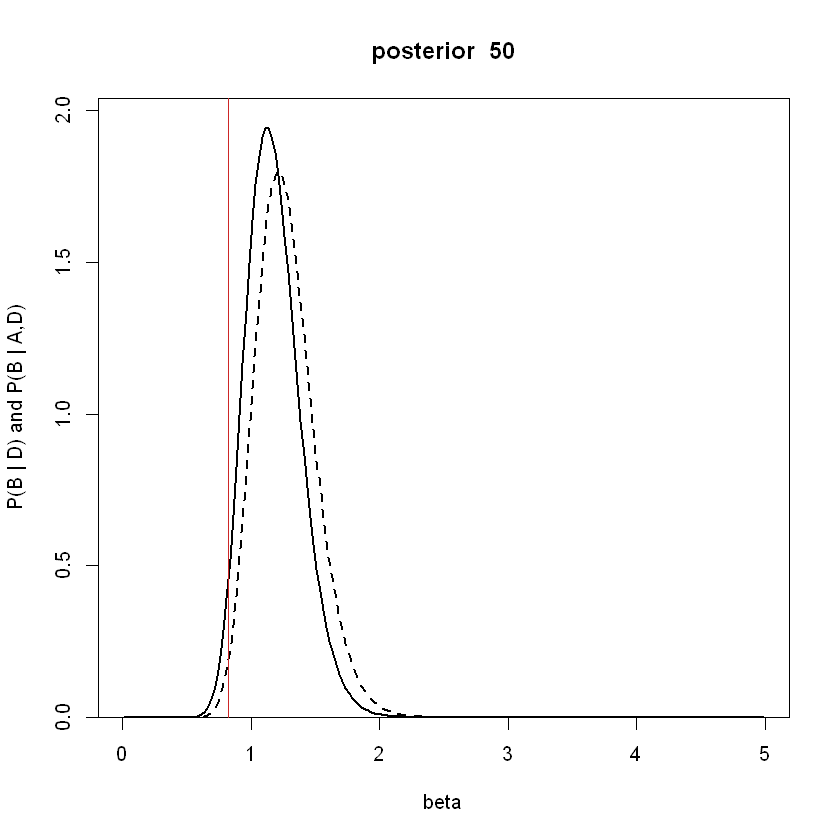

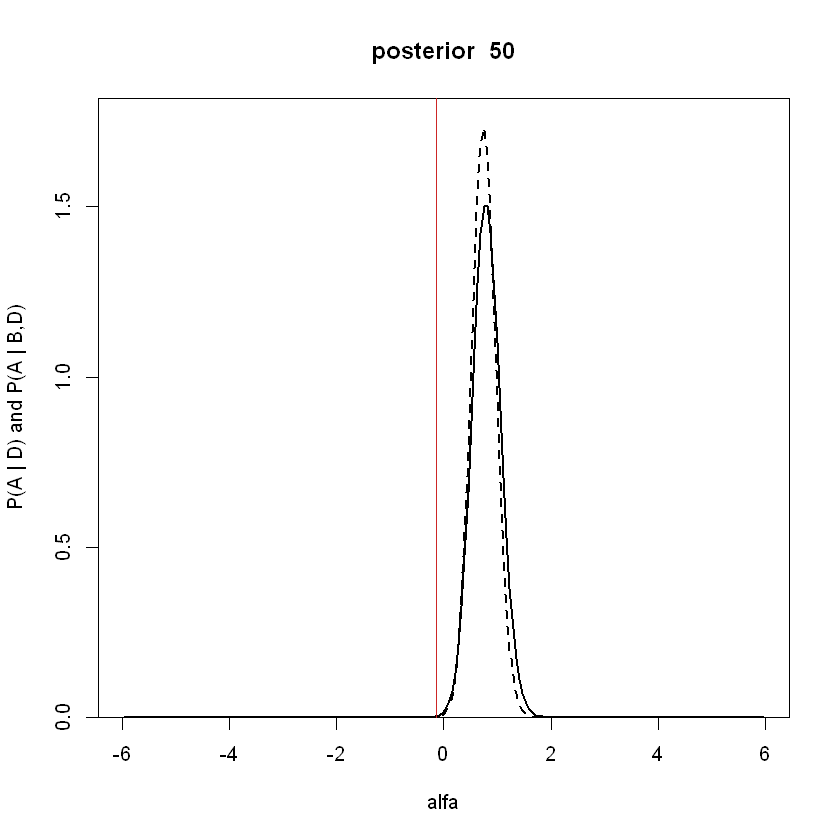

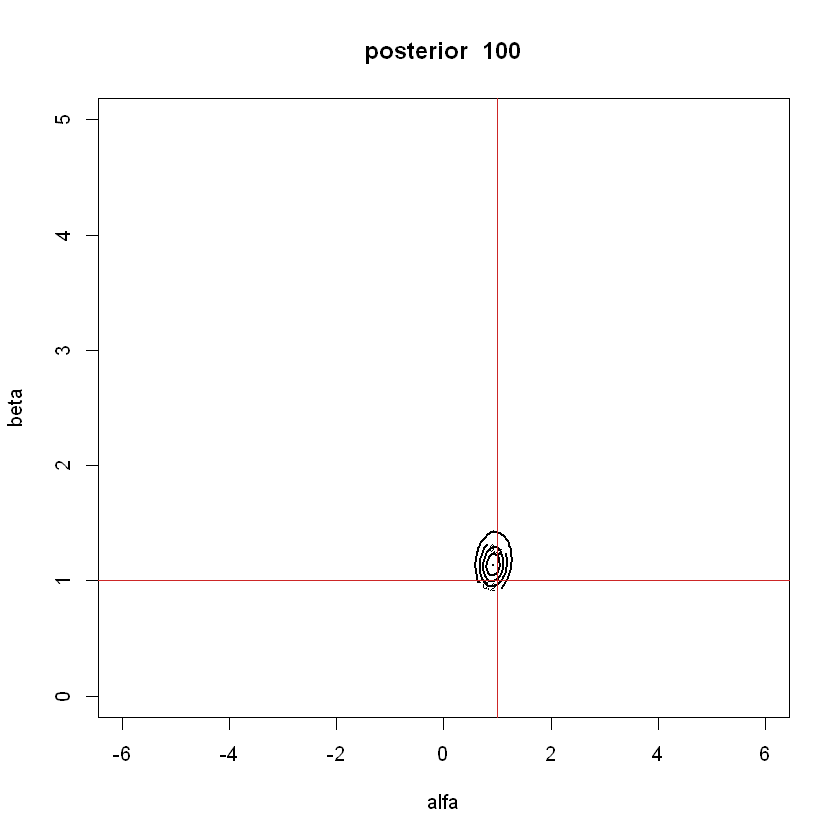

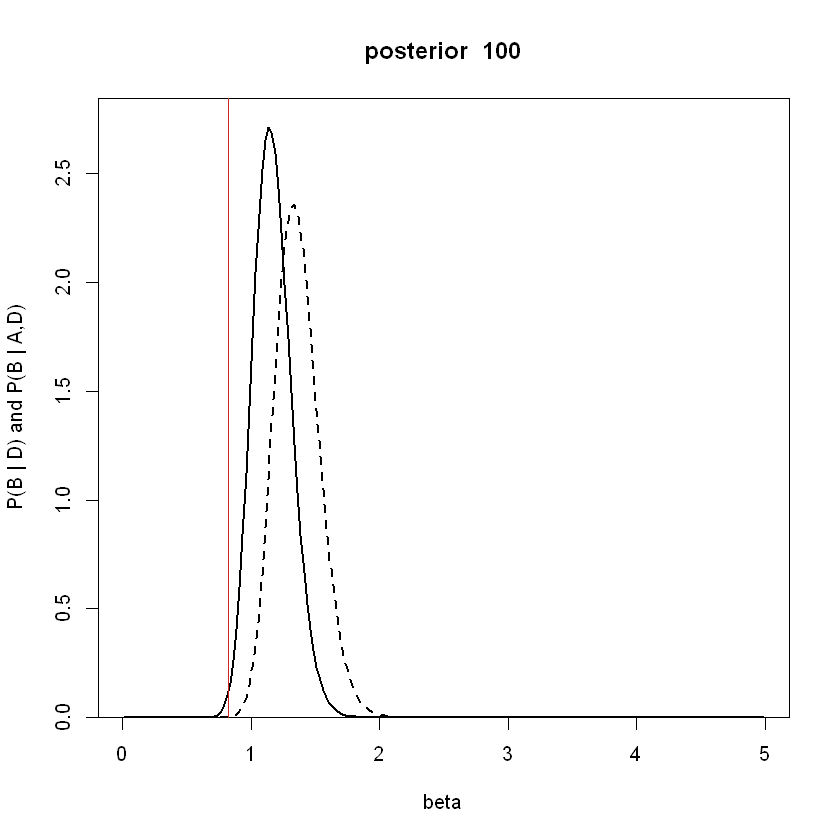

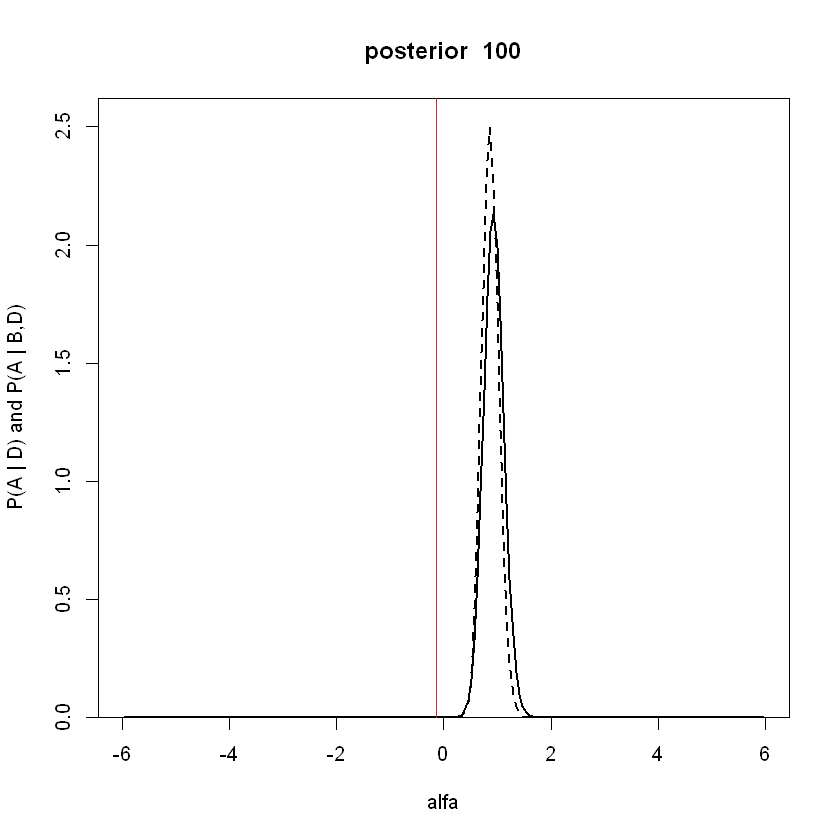

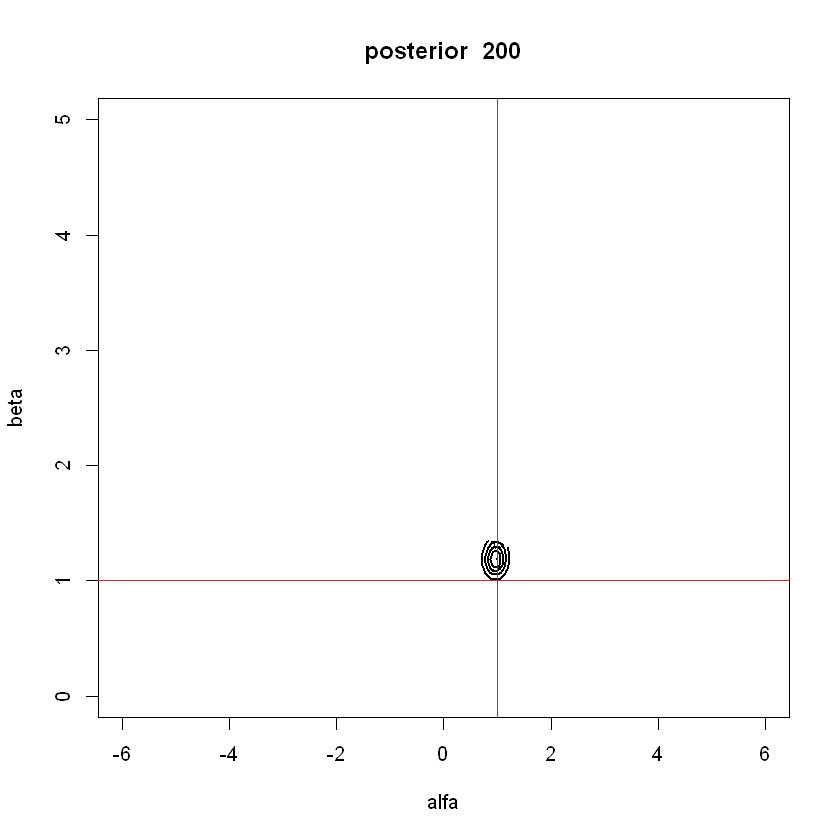

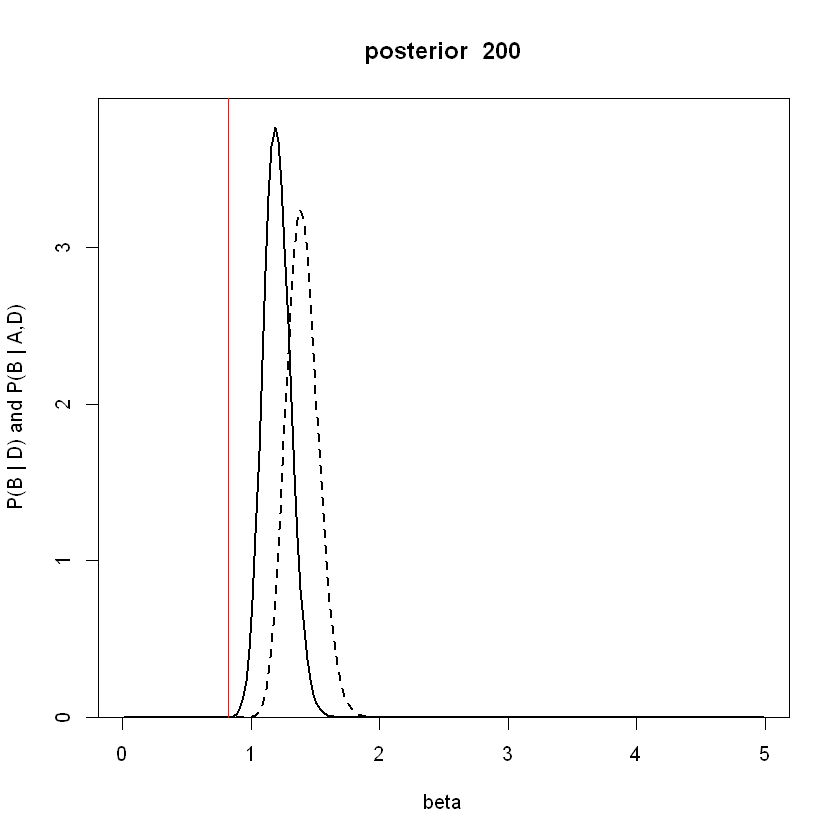

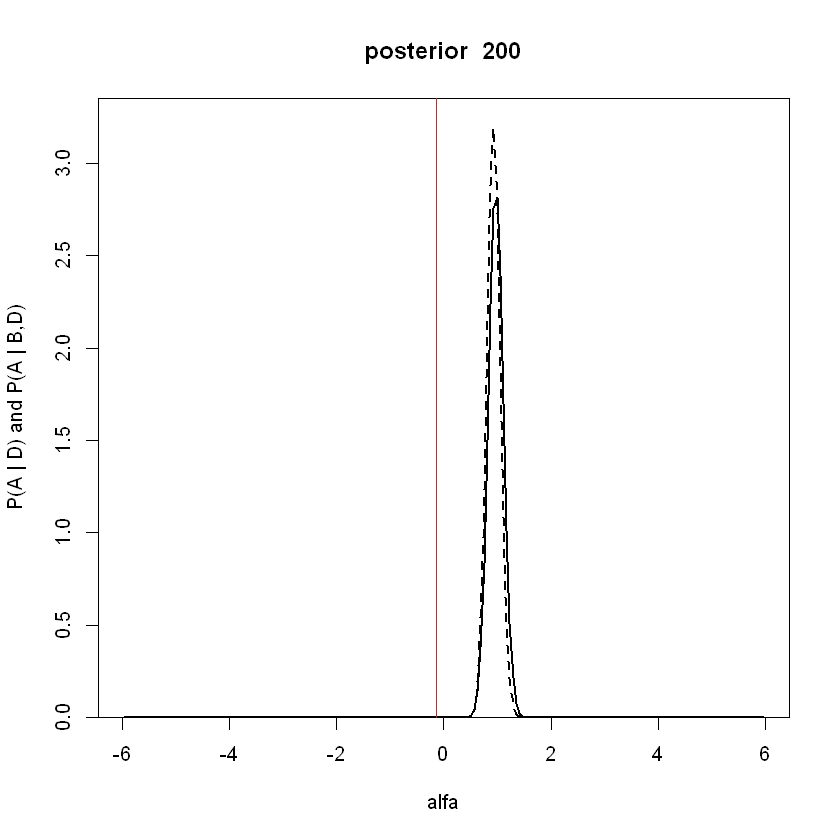

In [16]:
#define the loglikelihood
log_post <- function(a, b, data) {
  logL <- 0.0
  for (x in data) {
    logL <- logL - log(b*(1+ ((x-a)/b)^2))
  }
  return(logL)
}
#sampling grid for computing posterior
alim <- c(-6, 6)
blim <- c(0, 5)
nsamp <- 200
uniGrid <- seq(from=1/(2*nsamp), to=1-1/(2*nsamp), by=1/nsamp)
delta_a <- diff(alim )/ nsamp
delta_b <- diff(blim )/ nsamp
a <- alim[1] + diff(alim)* uniGrid
b <- blim[1] + diff(blim)* uniGrid
A_true <- runif(1, min(alim), max(alim))
B_true <- runif(1, min(blim), max(blim))
#print(paste(A_true))
#print(paste(B_true))
#simulate the data
data <- rnorm(200, 1, 2)
n_plot <- c(1, 5, 10, 50, 100, 200)
for (n in n_plot) {#log unnormalized posterior 
dx <- data[1:n]
z <- matrix(data=NA , nrow=length(a), ncol=length(b))
for(j in 1:length(a)) {
  for(k in 1:length(b)) {
    z[j,k] <- log_post(a[j], b[k], dx)
  }
}
z <- z - max(z) # set maximum to zero
    
#plot unnormalized 2D posterior
contour(a, b, exp(z),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="alfa",
    ylab="beta", main=paste("posterior ", n))
abline(v=1, h=1, col="firebrick3")
    
#compute normalized posterior
p_a_D <- apply(exp(z), 1, sum)
p_a_D <- p_a_D/( delta_a*sum(p_a_D))
p_b_D <- apply(exp(z), 2, sum)
p_b_D <- p_b_D/( delta_b*sum(p_b_D))

#We can see that as the size of the dataset increases the posterior becomes more peaked around its max 
#and closer to the true value

#can marginalize with respect to alfa and beta to find the best estimate
#compute normalized conditional posteriors using true values of conditioned parameters
p_a_bD <- exp( Vectorize (log_post , "a")(a, B_true, dx))
p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
p_b_aD <- exp( Vectorize (log_post , "b")(A_true, b, dx))
p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))

# Plot the 1D marginalized posteriors
plot(b, p_b_D, xlab="beta", yaxs="i",
ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B | D) and P(B | A,D)",
type="l", lwd=2, main=paste("posterior ", n))
lines(b, p_b_aD , lwd=2, lty=2)
abline(v=B_true , col="firebrick3")
plot(a, p_a_D, xlab="alfa", yaxs="i",
ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D) and P(A | B,D)",
type="l", lwd=2, main=paste("posterior ", n))
lines(a, p_a_bD , lwd=2, lty=2)
abline(v=A_true , col="firebrick3")
}

Exercise 3


**(a)** Vary the sampling resolution of used to generate the data, keeping the same sampling range

    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    
* Change the resolution $w = {0.1, 0.25, 1, 2, 3}$
* Check the effect on the results


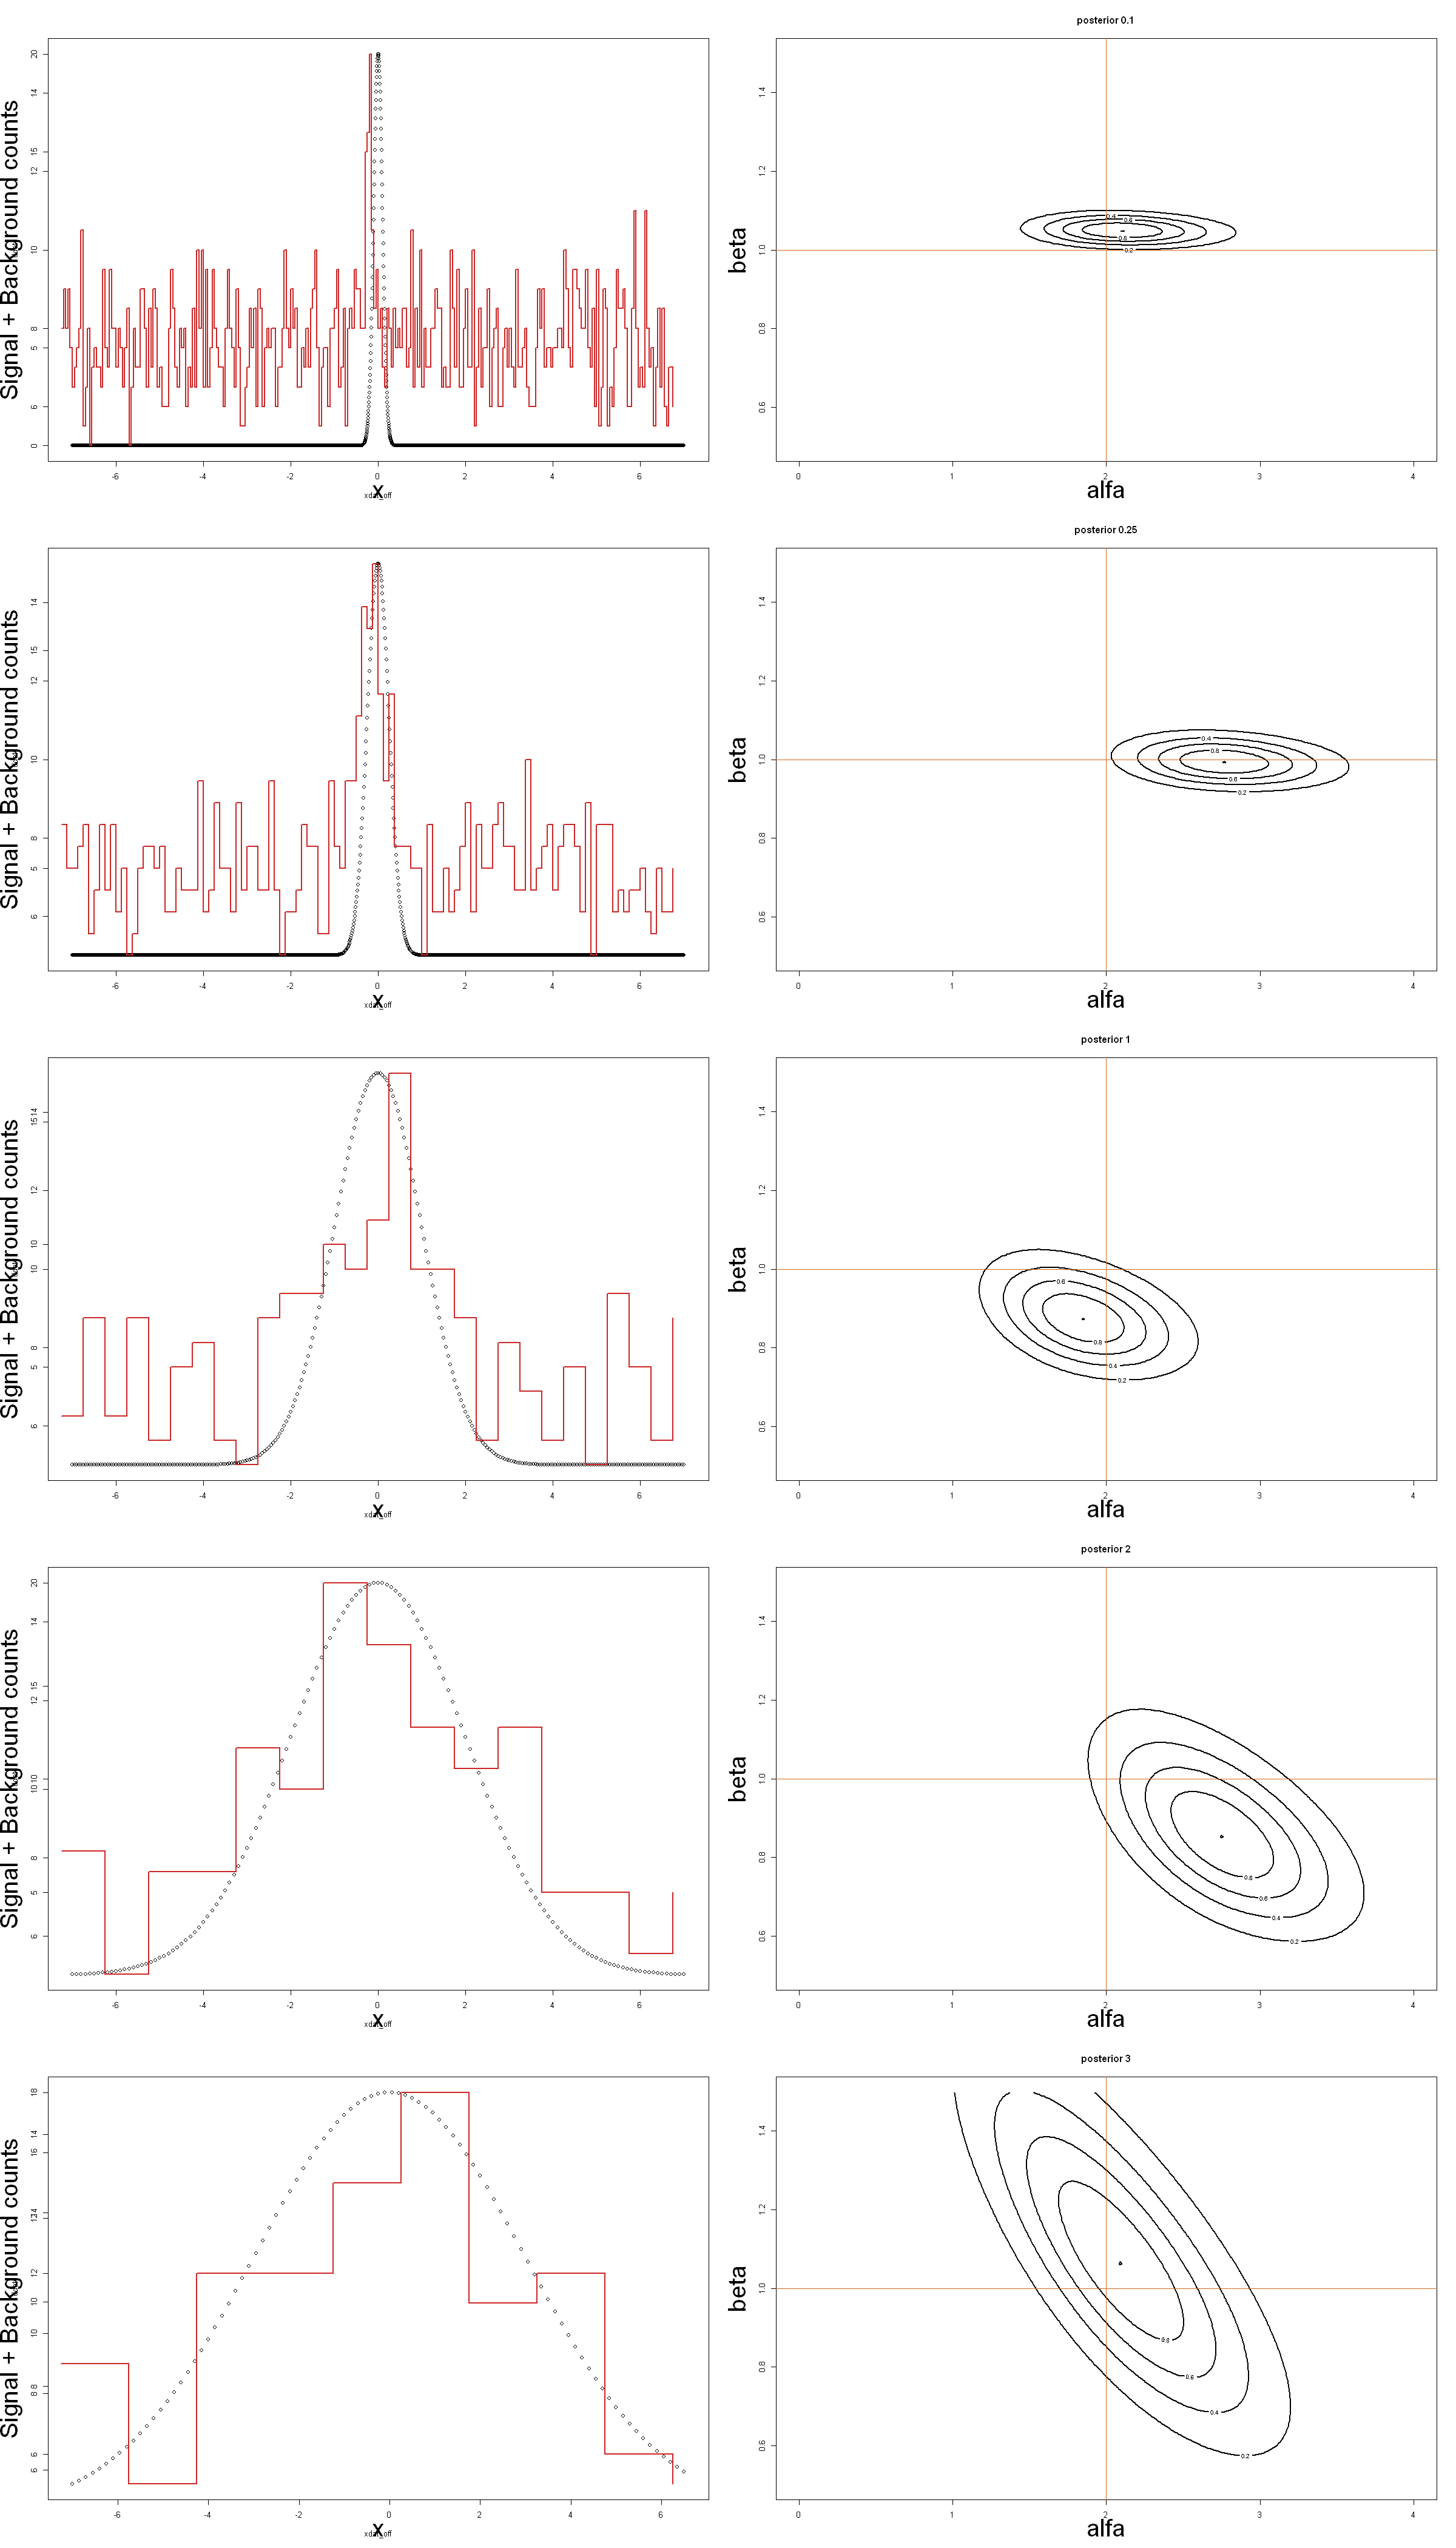

In [26]:
#generative model
signal <- Vectorize(function(x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
})
set.seed(12345)
#model parameters
x0 <- 0 #peak
w <- 1 #width
A_true <- 2 #signal amplitude
B_true <- 1 #background amplitude
Delta_t <- 5 #exposure time
samp_range <- 1
r  <- c(0.1, 0.25, 1, 2, 3)  

# Sampling grid for computing posterior
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 200
uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
delta_a <- diff(alim)/Nsamp 
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid 
b <- blim[1] + diff(blim)*uniGrid

#log posterior
log_post <- function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf )} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

#set graph size
options(repr.plot.width=20, repr.plot.height=35)     
par(mfrow= c(5,2), mar=c(5, 5, 4, 2))

# - Generate the observed data
z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
r <- c(0.1, 0.25, 1, 2, 3) #change samplying resolution, keep same range
for (i in r) {
xdat <- seq(from=-7*samp_range, to=7*samp_range, by=0.5*i)
s_true <- signal(xdat , A_true , B_true , x0, i, Delta_t)
ddat <- rpois(length(s_true), s_true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*i)
splot <- signal(xplot , A_true , B_true , x0, i, Delta_t)
plot(xplot , splot ,xlab="x", ylab="Signal + Background counts",cex.lab = 3)
par(new=TRUE)
xdat_off <- xdat -0.25
plot(xdat_off, ddat , type='s',col='firebrick3',
lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat )))
# Compute log unnormalized posterior
for(j in 1:length(a)) {
    for(k in 1:length(b)) {
      z[j,k] <- log_post(ddat, xdat, a[j], b[k], x0, i, Delta_t)
    } 
  }
z <- z - max(z) #maximum to zero
#plot unnormalized 2D contour posterior
contour(a, b, exp(z),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="alfa",
    ylab="beta", main=paste('posterior', i),cex.lab = 3)
abline(v=2, h=1, col="chocolate")
}
#looking at the 2D Posterior we infere that a smaller resolution (smaller binning) results in a Posterior more peaked 
#around the maximum but not closer to the true value


**(b)** Check the effect of varying the $A/B$ ratio 

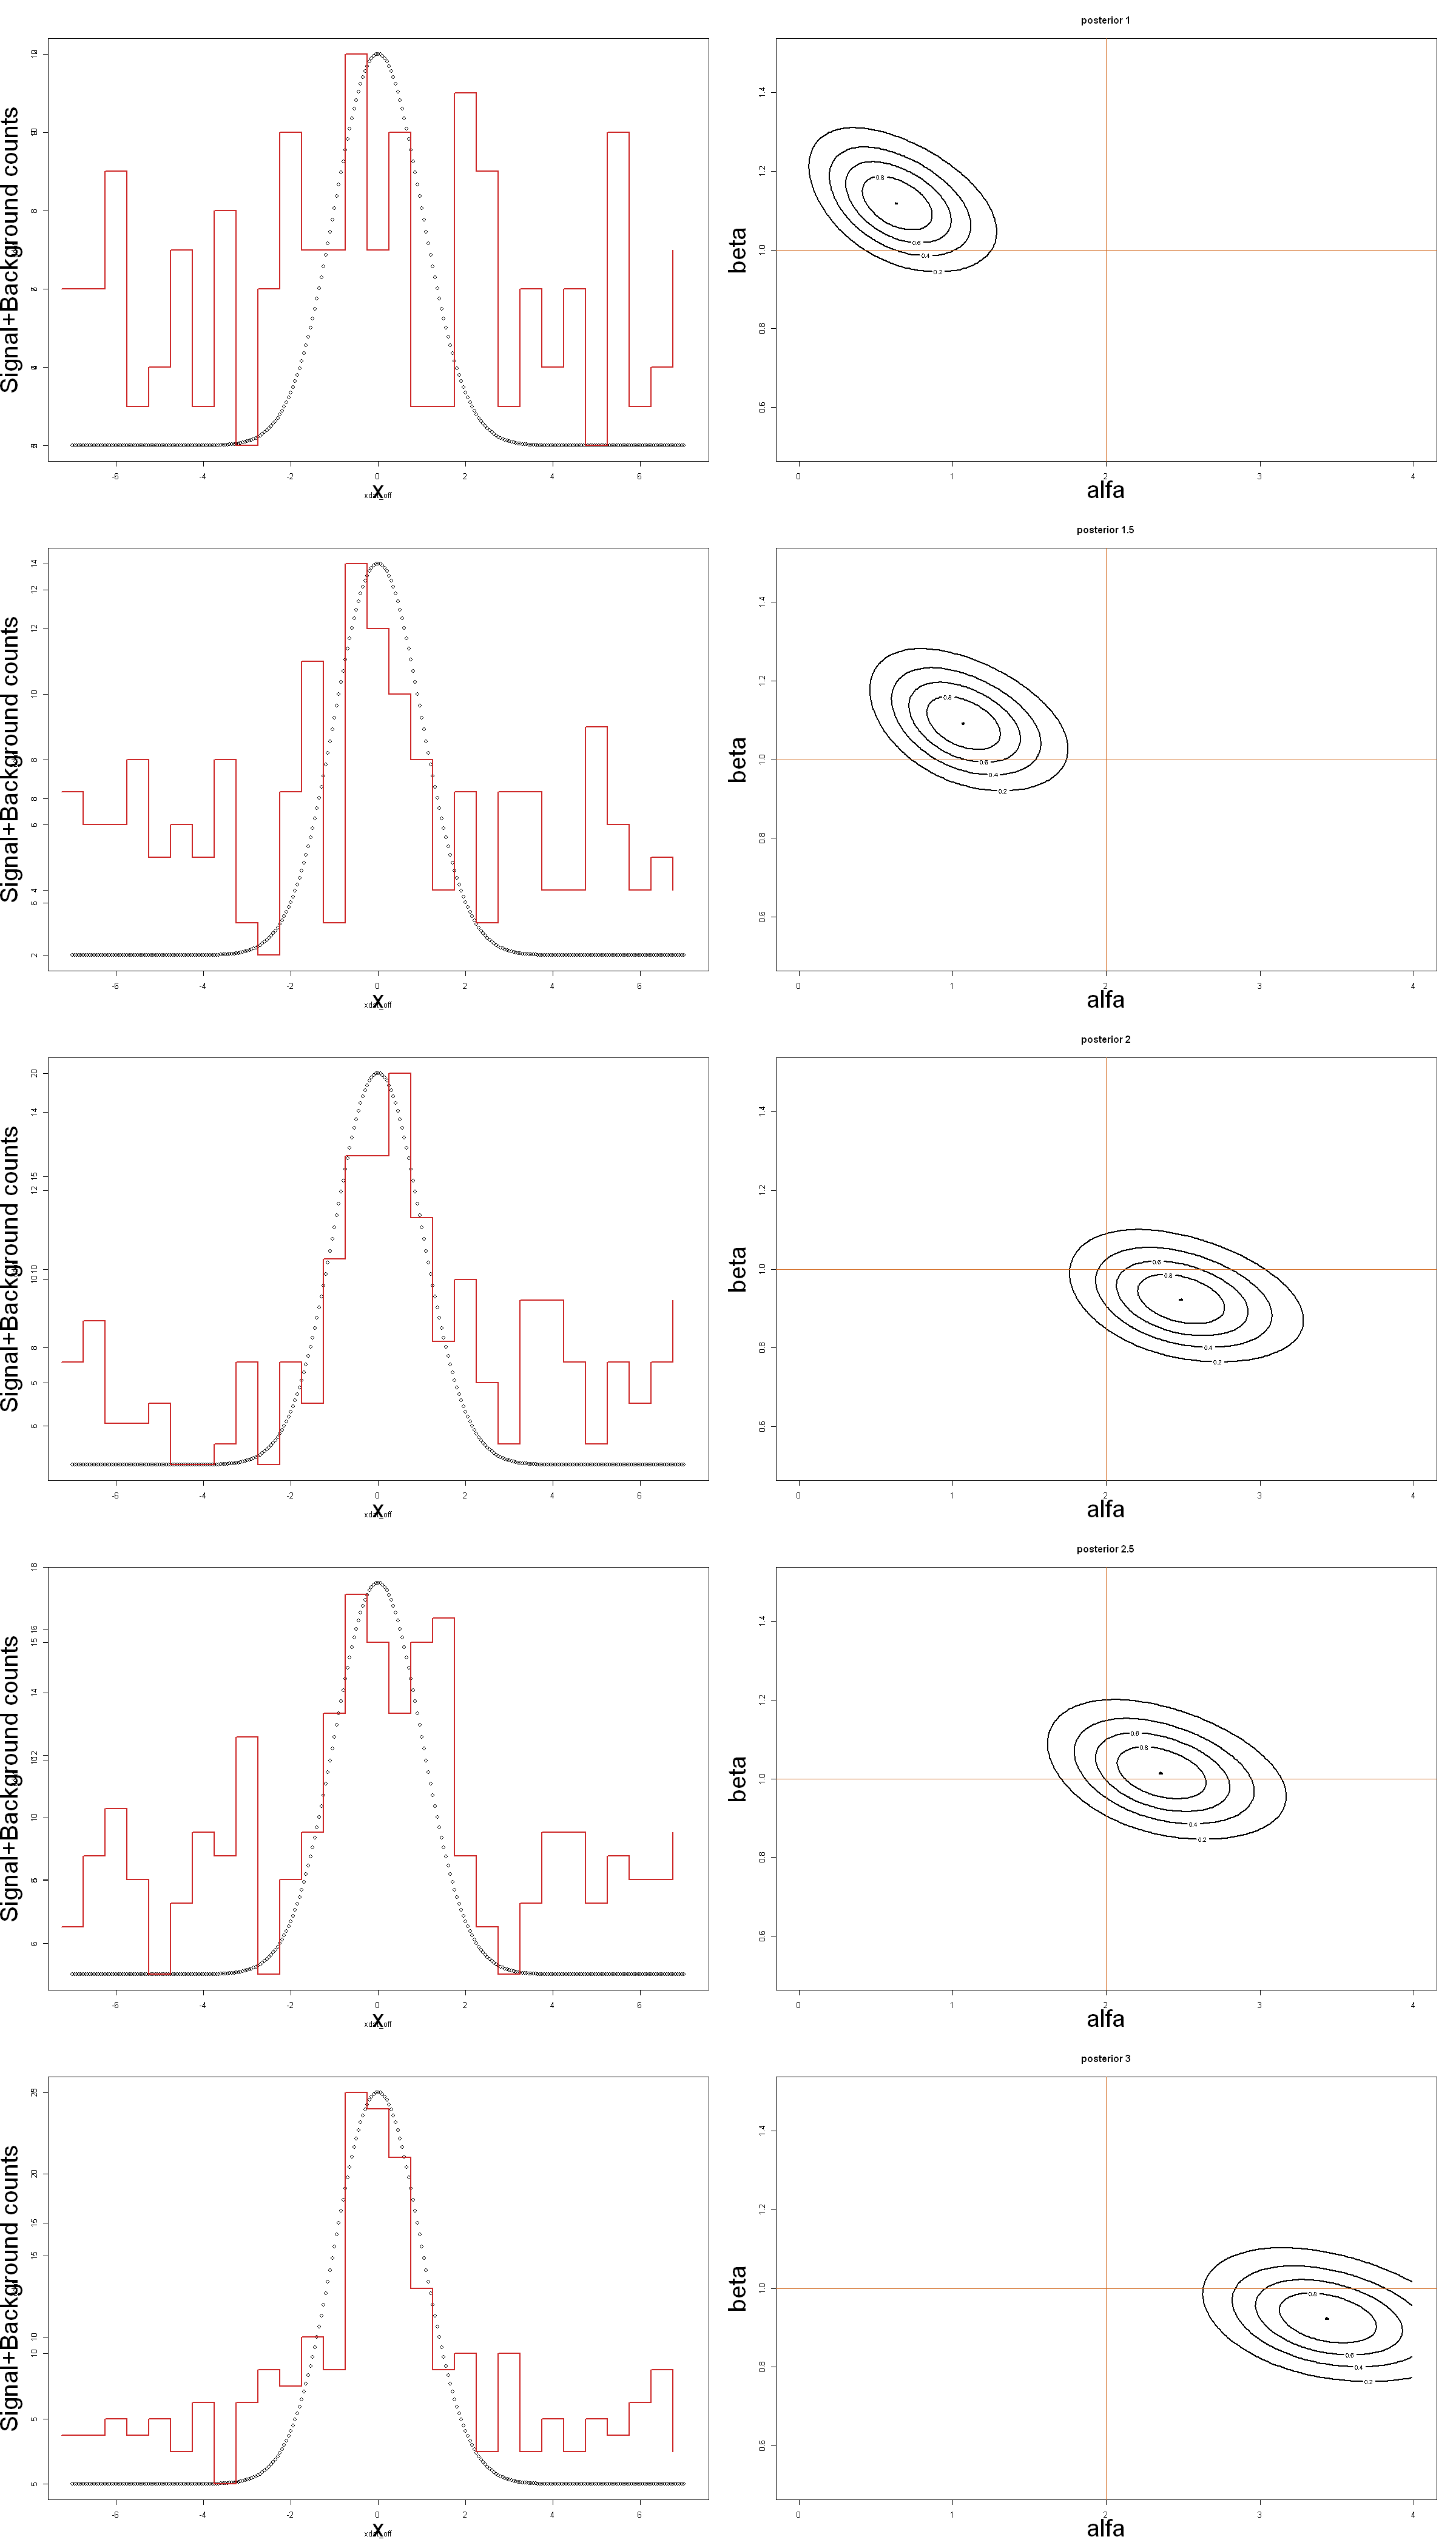

In [29]:
#check for A/B = {0.2, 0.5, 1, 2, 3} so fix B to 1 and let A assumes those values
#generative model
signal <- function(x, a, b, x0, w, t) {
  sig <- t*(a*exp(-(x-x0)^2/(2*w^2))+b)
  return(sig)
}

#model parameters
x0 <- 0 #peak
w <- 1 #width
A <- c(1, 1.5, 2, 2.5,  3) #signal amplitude
B_true <- 1 #background amplitude
Delta_t <- 5 #exposure time

#set graph size
options(repr.plot.width=20, repr.plot.height=35)     
par(mfrow= c(5,2), mar=c(5, 5, 4, 2))

#generate the observed data
for (A_true in A) {
xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
s_true <- signal(xdat , A_true , B_true , x0, w, Delta_t)
ddat <- rpois(length(s_true), s_true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
splot <- signal(xplot , A_true , B_true , x0, w, Delta_t)
plot(xplot , splot ,xlab="x", ylab="Signal+Background counts",cex.lab = 3)
par(new=TRUE)
xdat_off <- xdat -0.25
plot(xdat_off, ddat , type='s',col='firebrick3',
lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat )))
    
#log posterior
log_post <- function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf )} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}
#sampling grid for computing posterior
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 200
uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
delta_a <- diff(alim)/Nsamp 
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid 
b <- blim[1] + diff(blim)*uniGrid
    
#log unnormalized posterior
z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
for(j in 1:length(a)) {
    for(k in 1:length(b)) {
      z[j,k] <- log_post(ddat, xdat, a[j], b[k], x0, w, Delta_t)
    } 
  }
z <- z - max(z) # set maximum to zero
#plot unnormalized 2D contour posterior
contour(a, b, exp(z),
    nlevels = 5,
    labcex = 0.5,
    lwd = 2,
    xlab="alfa",
    ylab="beta" , main=paste('posterior', A_true),cex.lab = 3)
abline(v=2, h=1, col="chocolate")
}

#the signal to noise ratio becomes bigger so the histogram of the simulated data get closer to the shape of the signal peak
#which means the posterior get centered around the true value because of the noise small impact on the process